In [87]:
import pandas as pd
import numpy as np
import math
import datetime as dt

In [88]:
!pip install yfinance

In [89]:
import yfinance as yf
from datetime import datetime
# Define the ticker symbol
ticker = 'BTC-USD'

# start and end dates in 'YYYY-MM-DD' format
start_date = '2020-01-01'
end_date = datetime.today().date()

# Fetch data
data = yf.download(ticker, start=start_date, end=end_date)

# Save in CSV
data.to_csv('BTC-USD_historical_data.csv')


[*********************100%***********************]  1 of 1 completed


# Loading Dataset

In [90]:
# Load our dataset 
maindf=pd.read_csv('BTC-USD_historical_data.csv')

In [91]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1790
Total number of fields present in the dataset:  7


In [92]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [93]:
maindf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1790 non-null   object 
 1   Open       1790 non-null   float64
 2   High       1790 non-null   float64
 3   Low        1790 non-null   float64
 4   Close      1790 non-null   float64
 5   Adj Close  1790 non-null   float64
 6   Volume     1790 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 98.0+ KB


In [94]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1.790000e+03
mean,34999.668386,35775.309800,34200.147585,35048.036287,35048.036287,3.250144e+10
std,19331.960503,19780.794105,18887.292086,19375.928152,19375.928152,1.873014e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,19421.058594,19852.138184,19085.625977,19427.987793,19427.987793,2.043979e+10
50%,30827.955078,31910.902344,30223.400391,30924.302734,30924.302734,2.951006e+10
75%,48986.254883,50261.607422,47339.022461,48993.387695,48993.387695,3.950137e+10
max,99006.742188,99655.500000,97232.890625,98997.664062,98997.664062,3.509679e+11


In [95]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [96]:
maindf['Close_Lag1'] = maindf['Close'].shift(1) # last day ki closed value (to see data dependencies) kl aur aj ki value me kya diff aya
maindf['Close_Lag7'] = maindf['Close'].shift(7)
maindf['MA_7'] = maindf['Close'].rolling(window=7).mean()
maindf['MA_30'] = maindf['Close'].rolling(window=30).mean() 

# Drop any NaN values
maindf.dropna(inplace=True)

# EDA (exponential data analysis)

In [97]:
#start date and End date (row,col)
sd=maindf.iloc[0][0] 
ed=maindf.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2020-01-30
Ending Date 2024-11-24


C:\Users\HP\AppData\Local\Temp\ipykernel_19636\2173887764.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\HP\AppData\Local\Temp\ipykernel_19636\2173887764.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Analysis of year 2020

In [98]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01') & (maindf['Date'] < '2020-12-31')]
y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
29,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9316.629883,8406.515625,8929.163504,8357.228516
30,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9508.993164,8445.434570,9058.462751,8428.907015
31,2020-02-01,9346.357422,9439.323242,9313.239258,9392.875000,9350.529297,8367.847656,9204.895229,8509.153841
32,2020-02-02,9389.820312,9468.797852,9217.824219,9344.365234,9392.875000,8596.830078,9311.685965,8575.803206
33,2020-02-03,9344.683594,9540.372070,9248.633789,9293.521484,9344.365234,8909.819336,9366.500558,8638.565365
...,...,...,...,...,...,...,...,...,...
360,2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,24664.791016,23869.832031,24020.361328,20518.139062
361,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26437.037109,23477.294922,24419.647042,20823.602148
362,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,26272.294922,22803.082031,25031.322266,21135.848633
363,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27084.808594,23783.029297,25542.666295,21442.013737


In [99]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,9412.165039,9429.761230
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477327
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276855


In [100]:
#bar chart
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,title='Monthwise comparision between Bitcoin open and close price')
fig.show()


In [101]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [102]:
from itertools import cycle
import plotly.express as px

names = cycle(['Bitcoin Open Price', 'Bitcoin Close Price', 'Bitcoin High Price', 'Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'],y_2020['Close'],y_2020['High'],y_2020['Low']],labels={'Date':'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black', legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Analysis of Year 2021

In [103]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
366,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29001.720703,24664.791016,27767.629185,22428.243750
367,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,29374.152344,26437.037109,28580.519252,22850.972721
368,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32127.267578,26272.294922,29510.480469,23320.381315
369,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,32782.023438,27084.808594,30208.638393,23747.637435
370,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,31971.914062,27362.437500,31155.780134,24235.881055
...,...,...,...,...,...,...,...,...,...
725,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50429.859375,46707.015625,49613.073103,50529.215234
726,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50809.515625,46880.277344,50150.236049,50390.059896
727,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,50640.417969,48936.613281,49957.699219,50068.073177
728,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,47588.855469,48628.511719,49645.727679,49689.344661


In [104]:
monthvise = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967215,46306.798968
March,54544.678175,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154687
July,34234.212450,34444.973790
August,45516.119834,45709.022681
September,46041.859375,45939.771484


In [105]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [106]:
monthvise_high = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title='Monthwise High and Low Stock Price')
fig.show()


In [107]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                         y_2021['High'], y_2021['Low']],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Analysis of Year 2022

In [108]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
731,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,46306.445312,50429.859375,48093.554688,48704.621745
732,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47686.812500,50809.515625,47598.655134,48496.187500
733,2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,47345.218750,50640.417969,47001.183594,48404.767969
734,2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,46458.117188,47588.855469,46759.571987,48289.058854
735,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,45897.574219,46444.710938,46348.756696,48055.271484
...,...,...,...,...,...,...,...,...,...
1090,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16841.986328,16439.679688,16851.525949,16955.040039
1091,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16919.804688,16906.304688,16824.507254,16964.124935
1092,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16717.173828,16817.535156,16786.655413,16975.299935
1093,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16552.572266,16830.341797,16759.798270,16981.878581


In [109]:
monthvise = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319661
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [110]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [111]:
monthvise_high = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title='Monthwise High and Low Stock Price')
fig.show()


In [112]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                         y_2022['High'], y_2022['Low']],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Analysis of Year 2023

In [113]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01') & (maindf['Date'] < '2023-12-31')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
1096,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16547.496094,16841.986328,16658.150670,16933.572005
1097,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16625.080078,16919.804688,16625.102958,16926.246484
1098,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16688.470703,16717.173828,16619.772042,16911.225521
1099,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16679.857422,16552.572266,16664.152902,16907.505924
1100,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16863.238281,16642.341797,16691.923549,16899.080339
...,...,...,...,...,...,...,...,...,...
1455,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,43613.140625,42270.527344,43486.929688,41900.599609
1456,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,42520.402344,43652.250000,43457.016183,42106.889193
1457,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,43442.855469,43869.152344,43279.688058,42266.781510
1458,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42627.855469,43997.902344,43008.473772,42408.145182


In [114]:
monthvise = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198437
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [115]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [116]:
monthvise_high = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title='Monthwise High and Low Stock Price')
fig.show()


In [117]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                         y_2023['High'], y_2023['Low']],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Analysis of Year 2024

In [118]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01') & (maindf['Date'] < '2024-10-31')]
y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
1461,2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,42265.187500,43613.140625,42754.276786,42831.864974
1462,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44167.332031,42520.402344,43102.500558,42997.850911
1463,2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,44957.968750,43442.855469,43017.546317,43026.786849
1464,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,42848.175781,42627.855469,43239.270089,43030.095964
1465,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44179.921875,42099.402344,43534.025670,43043.970833
...,...,...,...,...,...,...,...,...,...
1760,2024-10-26,66628.734375,67317.921875,66360.593750,67014.695312,66642.414062,68362.734375,67425.902902,64680.868099
1761,2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,67014.695312,69001.703125,67272.702009,64752.155859
1762,2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,67929.296875,67367.851562,67635.545759,64886.159505
1763,2024-10-29,69910.046875,73577.210938,69729.914062,72720.492188,69907.757812,67361.406250,68401.129464,65122.332422


In [119]:
monthvise = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67372.752394,67702.439264
April,66239.900911,65882.380599
May,65044.212198,65266.317288
June,66058.262370,65899.465755
July,62737.764869,62804.542087
August,60103.896673,59921.197581
September,60213.192448,60358.515885


In [120]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [121]:
monthvise_high = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock High Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock Low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title='Monthwise High and Low Stock Price')
fig.show()


In [122]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_2024, x=y_2024.Date,y=[y_2024['Open'],y_2024['Close'],y_2024['High'], y_2024['Low']],labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Overall Analysis from 2020-2024

In [123]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2020-01-01') & (maindf['Date'] <= '2024-10-31')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Close_Lag1,Close_Lag7,MA_7,MA_30
29,2020-01-30,9316.016602,9553.125977,9230.897461,9508.993164,9316.629883,8406.515625,8929.163504,8357.228516
30,2020-01-31,9508.313477,9521.706055,9230.776367,9350.529297,9508.993164,8445.434570,9058.462751,8428.907015
31,2020-02-01,9346.357422,9439.323242,9313.239258,9392.875000,9350.529297,8367.847656,9204.895229,8509.153841
32,2020-02-02,9389.820312,9468.797852,9217.824219,9344.365234,9392.875000,8596.830078,9311.685965,8575.803206
33,2020-02-03,9344.683594,9540.372070,9248.633789,9293.521484,9344.365234,8909.819336,9366.500558,8638.565365
...,...,...,...,...,...,...,...,...,...
1761,2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,67014.695312,69001.703125,67272.702009,64752.155859
1762,2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,67929.296875,67367.851562,67635.545759,64886.159505
1763,2024-10-29,69910.046875,73577.210938,69729.914062,72720.492188,69907.757812,67361.406250,68401.129464,65122.332422
1764,2024-10-30,72715.367188,72905.296875,71411.734375,72339.539062,72720.492188,66432.195312,69245.035714,65422.667057


In [124]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34341.639369,34359.507867
February,33671.230455,33916.660142
March,39139.085285,39330.920498
April,40232.052773,40121.294437
May,36170.247303,36035.633613
June,32782.774310,32676.146315
July,31602.972360,31687.227879
August,33538.147379,33500.334722
September,32607.474785,32613.895970


In [125]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building Model 

In [126]:
from sklearn.preprocessing import StandardScaler 
features = ['Open', 'High', 'Low', 'Close', 'Close_Lag1', 'Close_Lag7', 'MA_7', 'MA_30']
target = 'Close'

scaler = StandardScaler()
maindf[features] = scaler.fit_transform(maindf[features])

In [127]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1761, 2)


In [128]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2020-2024', plot_bgcolor='white',font_size=15, font_color='black')
fig.show()

In [129]:
closedf = closedf[closedf['Date'] > '2020-02-27']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1732


# Normalizing Data
MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [130]:
from sklearn.preprocessing import MinMaxScaler 
# to use a common scale, without distorting differences in the ranges of values or losing information
if 'Date' in closedf.columns:
    del closedf['Date']

scaler = MinMaxScaler(feature_range=(0, 1))
closedf_scaled = scaler.fit_transform(closedf)
closedf_scaled = pd.DataFrame(closedf_scaled, columns=closedf.columns)
print(closedf_scaled.shape)

(1732, 1)


In [131]:
training_size = int(len(closedf) * 0.60) #60%,40%
test_size = len(closedf) - training_size

train_data = closedf.iloc[0:training_size, :]
test_data = closedf.iloc[training_size:len(closedf), :]

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1039, 1)
test_data:  (693, 1)


## Now we Transform the Close price based on Time-series-analysis forecasting requirement

In [132]:
# convert array into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [133]:
import numpy as np
time_step = 15 # 15 consecutive values
X_train, y_train = create_dataset(train_data.values, time_step) 
X_test, y_test = create_dataset(test_data.values, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)


X_train:  (1023, 15)
y_train:  (1023,)
X_test:  (677, 15)
y_test:  (677,)


In [134]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1023, 15, 1)
X_test:  (677, 15, 1)


# LSTM

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
#Non-Linearity,Efficient Computation (size=10 vector in each space)
model.add(LSTM(10, activation="relu")) #Rectified Linear Unit -> f(x)=max(0,x)
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")


In [161]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,verbose=1) # iterate 15 time each time,model updates wt after processing each batch

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.5364 - val_loss: 0.2721
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2032 - val_loss: 2.0114
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0322 - val_loss: 0.7105
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0230 - val_loss: 0.4777
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - val_loss: 0.2602
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - val_loss: 0.2109
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0167 - val_loss: 0.2372
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0167 - val_loss: 0.1621
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0137 - val_loss: 0.1224
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0128 - val_loss: 0.0842


# Plotting Loss vs Validation loss

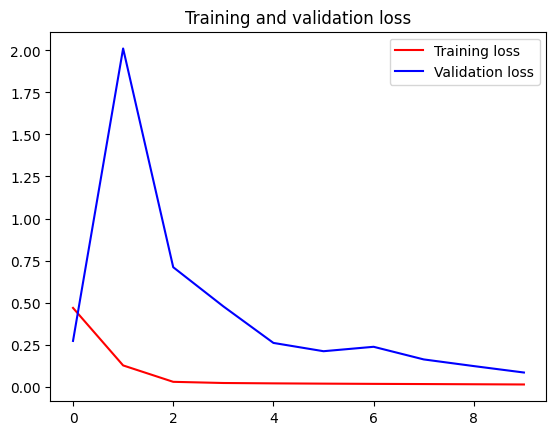

<Figure size 640x480 with 0 Axes>

In [162]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [163]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


((1023, 1), (677, 1))

# Model Evaluation

In [164]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

# Evaluation metrices RMSE, MSE and MAE

In [165]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# train and test errors
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict)) # (pred-actual)^2/n
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict)) # sum of pred-actual/num of pred
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.538191796625412
Train data MSE:  0.2896504099548887
Train data MAE:  0.35679260184507844
-------------------------------------------------------------------------------------
Test data RMSE:  1.4194508998350406
Test data MSE:  2.0148408570425067
Test data MAE:  0.6461130457796335


In [166]:
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9841853223856222
Test data R2 score: 0.9082451239604032


# Comparision of original Bitcoin close price and predicted close price

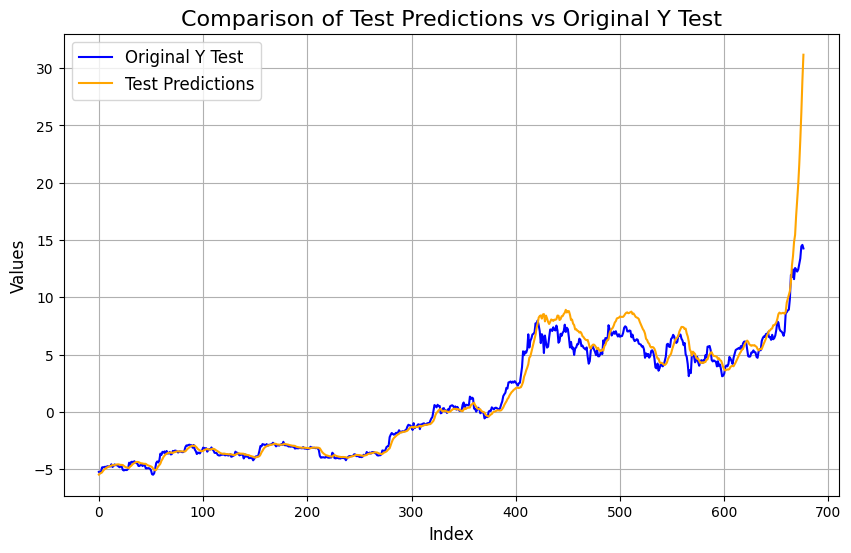

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(original_ytest, label="Original Y Test", color='blue')
plt.plot(test_predict, label="Test Predictions", color='orange')

plt.title("Comparison of Test Predictions vs Original Y Test", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.legend(loc="best", fontsize=12)

plt.grid(True)
plt.show()

# Next 10 days prediction

In [168]:
def predict_next_10_days(model, last_data, scaler, time_step=15):
    predictions = []
    current_input = last_data.reshape(1, time_step, 1)  

    for _ in range(10): 
        next_prediction = model.predict(current_input, verbose=0)  
        predictions.append(next_prediction[0, 0]) 

        # Update the current input with the new prediction
        next_prediction_reshaped = np.array(next_prediction[0, 0]).reshape(1, 1, 1) 
        current_input = np.append(current_input[:, 1:, :], next_prediction_reshaped, axis=1)
   
    # If scaler was fitted on multi-dimensional data, use the correct column
    if scaler.n_features_in_ > 1:
        single_feature_scaler = scaler.scale_[0] 
        single_feature_mean = scaler.mean_[0] if hasattr(scaler, 'mean_') else 0
        predictions = [(p * single_feature_scaler) + single_feature_mean for p in predictions]
    else:
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    
    return np.array(predictions).flatten()

last_time_step_data = closedf_scaled.values[-time_step:]
next_10_days_predictions = predict_next_10_days(model, last_time_step_data, scaler)

print("Next 10 days predictions:")
print(next_10_days_predictions)

Next 10 days predictions:
[2.7757099 2.6704147 2.599419  2.5383053 2.4798038 2.423923  2.363114
 2.3008666 2.238458  2.174946 ]


# Plotting 10 days pred price

Trend Summary for the Next 10 Days:
Up days: 0 days
Down days: 9 days
Sideways days: 0 days


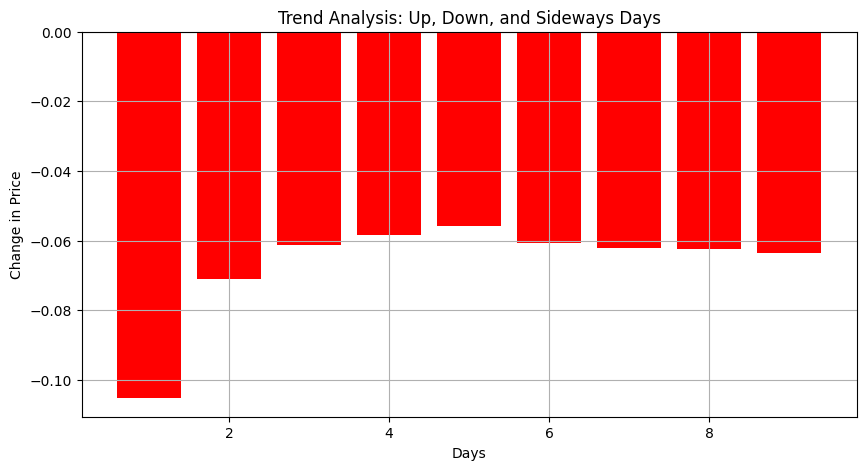

In [169]:
changes = np.diff(next_10_days_predictions)
trend_summary = {"up": 0, "down": 0, "sideways": 0}
trends = []

for change in changes:
    if change > 0.01:  
        trends.append("up")
        trend_summary["up"] += 1
    elif change < -0.01:  
        trends.append("down")
        trend_summary["down"] += 1
    else:  
        trends.append("sideways")
        trend_summary["sideways"] += 1

print("Trend Summary for the Next 10 Days:")
for key, value in trend_summary.items():
    print(f"{key.capitalize()} days: {value} days")
    
days = np.arange(1, 11)
colors = {"up": "green", "down": "red", "sideways": "gray"}
colored_trends = [colors[t] for t in trends]

plt.figure(figsize=(10, 5))
plt.bar(days[:-1], changes, color=colored_trends, label="Trends")
plt.axhline(0, color='black', linewidth=0.5)  
plt.title("Trend Analysis: Up, Down, and Sideways Days")
plt.xlabel("Days")
plt.ylabel("Change in Price")
plt.grid(True)
plt.show()


In [145]:
dates = pd.date_range(start="2024-12-01", periods=10, freq="D")
close_prices = np.random.uniform(67000, 100000, size=10) 
price_changes = np.diff(close_prices, prepend=close_prices[0])  

directions = ["Up" if change > 0 else "Down" for change in price_changes]
trend_signals = [1 if direction == "Up" else -1 for direction in directions]
volatility_signals = [1 if abs(change) > 500 else 0 for change in price_changes]
momentum_signals = ["Sell" if change > 0 else "Hold" for change in price_changes]

# Define call/put strategies
options_strategy = [
    "Call Buy" if trend == 1 else "Put Sell" for trend in trend_signals
]

support_signals = ["Bullish" if direction == "Up" else "Bearish" for direction in directions]

df = pd.DataFrame({
    "Date": dates,
    "Close_Price": close_prices,
    "Price_Direction": directions,
    "Volatility_Signal": volatility_signals,
    "Trend_Signal": trend_signals,
    "Momentum_Signal": momentum_signals,
    "Options_Strategy": options_strategy,
    "Support_Signal": support_signals
})
df.set_index("Date", inplace=True)
print(df)

             Close_Price Price_Direction  Volatility_Signal  Trend_Signal  \
Date                                                                        
2024-12-01  94292.831737            Down                  0            -1   
2024-12-02  90235.993074            Down                  1            -1   
2024-12-03  88434.660729            Down                  1            -1   
2024-12-04  92787.299262              Up                  1             1   
2024-12-05  84250.801866            Down                  1            -1   
2024-12-06  98281.273477              Up                  1             1   
2024-12-07  88047.323241            Down                  1            -1   
2024-12-08  82789.989824            Down                  1            -1   
2024-12-09  78855.054594            Down                  1            -1   
2024-12-10  74443.907667            Down                  1            -1   

           Momentum_Signal Options_Strategy Support_Signal  
Date          

In [170]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller

result = adfuller(closedf['Close'].dropna())
if result[1] > 0.05:
    print("Data is non-stationary, differencing will be applied")
    bitcoin_prices = closedf['Close'].diff().dropna() 
else:
    print("Data is stationary")
    bitcoin_prices = closedf['Close']

model = ARIMA(bitcoin_prices, order=(5, 1, 5))
model_fit = model.fit()

forecast_steps = 60 
forecast = model_fit.forecast(steps=forecast_steps)

Data is non-stationary, differencing will be applied


C:\Users\HP\anaconda3\envs\testingOpenAi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\envs\testingOpenAi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\envs\testingOpenAi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\envs\testingOpenAi\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\HP\anaconda3\envs\testingOpenAi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\HP\anaconda3

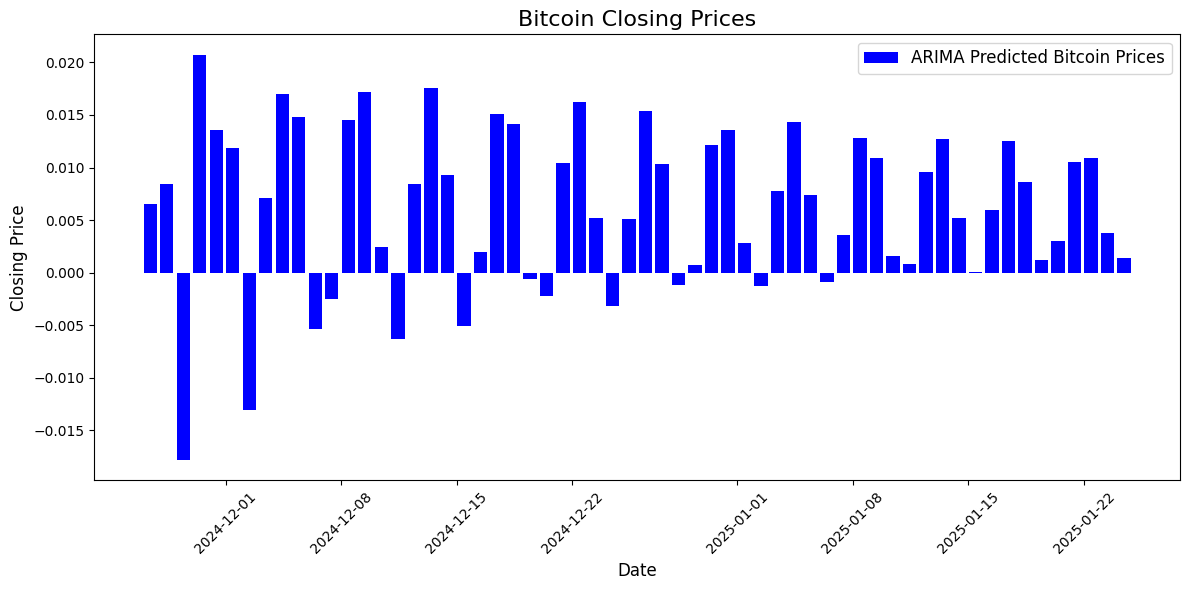

In [171]:
from datetime import datetime, timedelta

forecast_steps = len(forecast)  
predicted_prices = forecast 

start_date = datetime.today()
forecast_dates = [start_date + timedelta(days=i) for i in range(forecast_steps)]

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_prices})
forecast_df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(forecast_df.index, forecast_df['Predicted_Close'], color='blue', label='ARIMA Predicted Bitcoin Prices')
plt.title('Bitcoin Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
